In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import argparse
from os.path import basename, join

In [2]:
def confidence_plot(ax, algo, style, label, plot_data):
    regret_mean = plot_data['mean']
    regret_std = plot_data['std']
    T = len(regret_mean)
    ax.plot(regret_mean, style, markevery=int(T/5), label=label)
    ax.fill_between(range(T), regret_mean+regret_std, regret_mean-regret_std, alpha=0.3)

def pre_process_data(data_path):
    files = glob.glob(join(data_path,"*.pkl"))


    results = {}
    for fn in files:
        data=pickle.load(open(fn, 'rb'))
        eps = data['initial_epsilon']
        algo = data['algorithm']
        if eps not in results:
            results[eps] = {'ind':[], 'dis':[], 'hlin': []}
        results[eps][algo].append(data['regret'])

    plot = {}
    for eps in results.keys():
        plot[eps]= {}
        for algo in ['ind', 'dis', 'hlin']:
            regret_mat=np.cumsum(np.array(results[eps][algo]), axis=1)

            plot_data={}
            plot_data['mean']=np.mean(regret_mat, axis=0)
            plot_data['std']= 1.96 *np.std(regret_mat, axis=0)
            plot[eps][algo]=plot_data

    return plot

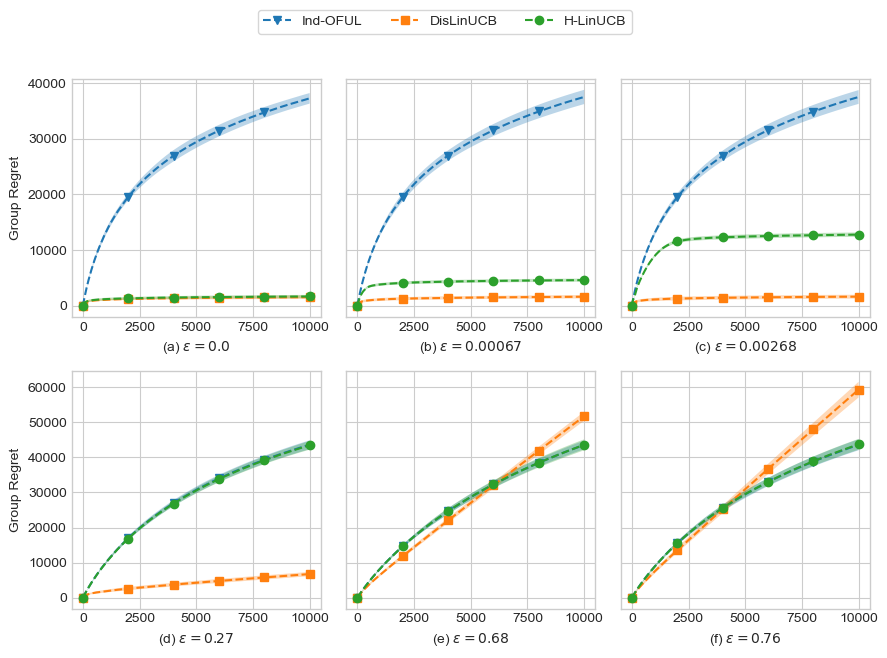

In [4]:
plot_data = pre_process_data('dump')
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(2,3, sharey='row')
fig.set_figheight(6)
fig.set_figwidth(9)

for eps, ax, i in zip( sorted(plot_data.keys()), axs.flatten(), range(6)):
    confidence_plot(ax,'ind', '--v', 'Ind-OFUL', plot_data[eps]['ind'])
    confidence_plot(ax,'dis', '--s', 'DisLinUCB', plot_data[eps]['dis'])
    confidence_plot(ax,'hlin', '--o', 'H-LinUCB', plot_data[eps]['hlin'])
    ax.set_xlabel('({}) $\epsilon={}$'.format(chr(97+i), eps))

handles, labels = axs[0,0].get_legend_handles_labels()

axs[0,0].set_ylabel('Group Regret')
axs[1,0].set_ylabel('Group Regret')
fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0.5, 1.1), ncol=3, frameon=True)
fig.tight_layout()
plt.savefig('plot.pdf',bbox_inches='tight')